Varshith Thungapalli 
22WU0105025
DS-B

Baseline Model (No Regularization)

Epoch 1/20


c:\Users\VARSHITH\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 - 4s - 4ms/step - accuracy: 0.9162 - loss: 0.2687 - val_accuracy: 0.9603 - val_loss: 0.1324
Epoch 2/20
938/938 - 2s - 2ms/step - accuracy: 0.9662 - loss: 0.1098 - val_accuracy: 0.9639 - val_loss: 0.1143
Epoch 3/20
938/938 - 3s - 3ms/step - accuracy: 0.9751 - loss: 0.0822 - val_accuracy: 0.9708 - val_loss: 0.0995
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.9801 - loss: 0.0640 - val_accuracy: 0.9724 - val_loss: 0.0941
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.9828 - loss: 0.0543 - val_accuracy: 0.9764 - val_loss: 0.0878
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.9852 - loss: 0.0486 - val_accuracy: 0.9780 - val_loss: 0.0760
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.9882 - loss: 0.0376 - val_accuracy: 0.9765 - val_loss: 0.0872
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.9887 - loss: 0.0356 - val_accuracy: 0.9766 - val_loss: 0.0898
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.9899 - loss: 0.0316 - val_accuracy: 0.9749 - val_loss: 0.0898
Epoch 10/20


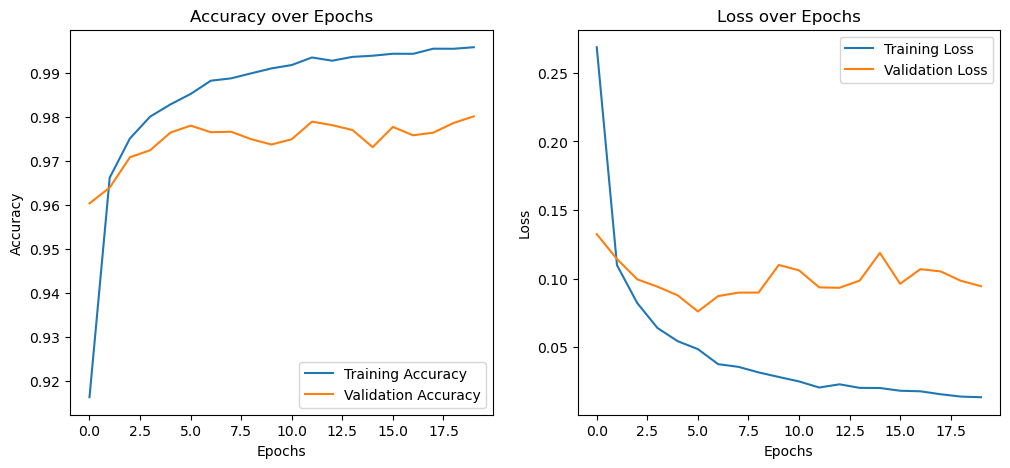

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Build baseline model
def build_baseline_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and plot the results
def train_and_plot(model):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=2)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Create and train baseline model
baseline_model = build_baseline_model()
train_and_plot(baseline_model)


L1 Regularization Model

Epoch 1/20
938/938 - 4s - 4ms/step - accuracy: 0.1147 - loss: 6.5050 - val_accuracy: 0.1135 - val_loss: 2.5079
Epoch 2/20
938/938 - 2s - 3ms/step - accuracy: 0.1124 - loss: 2.5078 - val_accuracy: 0.1135 - val_loss: 2.5069
Epoch 3/20
938/938 - 3s - 3ms/step - accuracy: 0.1124 - loss: 2.5078 - val_accuracy: 0.1135 - val_loss: 2.5087
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5077 - val_accuracy: 0.1135 - val_loss: 2.5076
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5077 - val_accuracy: 0.1135 - val_loss: 2.5067
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5076 - val_accuracy: 0.1135 - val_loss: 2.5070
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5077 - val_accuracy: 0.1135 - val_loss: 2.5067
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5076 - val_accuracy: 0.1135 - val_loss: 2.5064
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5076 - val_accuracy: 0.1135 - val_loss: 2.5080
E

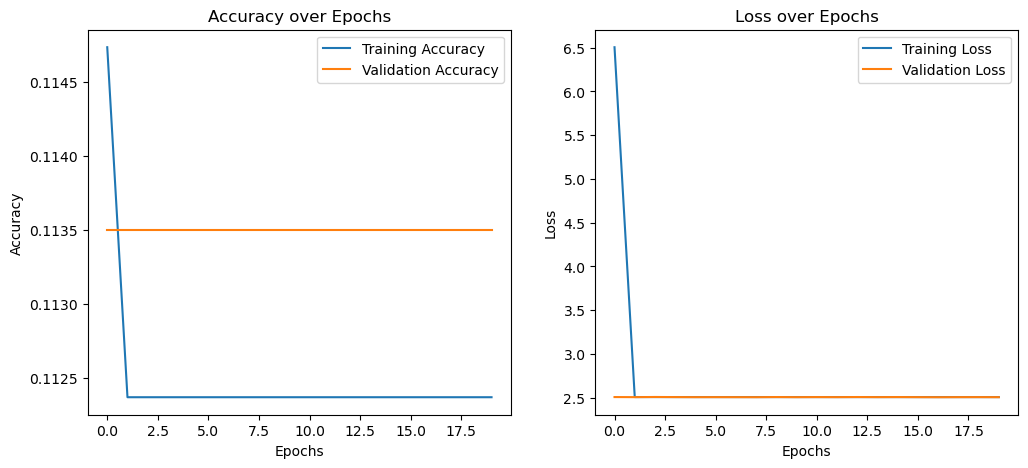

In [4]:
from tensorflow.keras import regularizers

# Build L1 regularization model
def build_l1_model(lambda_value=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(lambda_value)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and plot the results
def train_and_plot(model):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=2)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Create and train L1 model
l1_model = build_l1_model()
train_and_plot(l1_model)


 L2 Regularization Model

Epoch 1/20
938/938 - 4s - 4ms/step - accuracy: 0.8678 - loss: 1.6098 - val_accuracy: 0.9206 - val_loss: 0.8064
Epoch 2/20
938/938 - 2s - 2ms/step - accuracy: 0.9178 - loss: 0.7500 - val_accuracy: 0.9333 - val_loss: 0.6613
Epoch 3/20
938/938 - 2s - 2ms/step - accuracy: 0.9309 - loss: 0.6493 - val_accuracy: 0.9414 - val_loss: 0.5976
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.9346 - loss: 0.5993 - val_accuracy: 0.9385 - val_loss: 0.5672
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.9370 - loss: 0.5736 - val_accuracy: 0.9373 - val_loss: 0.5762
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.9418 - loss: 0.5428 - val_accuracy: 0.9480 - val_loss: 0.5070
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.9428 - loss: 0.5245 - val_accuracy: 0.9493 - val_loss: 0.4925
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.9454 - loss: 0.5088 - val_accuracy: 0.9458 - val_loss: 0.4929
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.9472 - loss: 0.4923 - val_accuracy: 0.9512 - val_loss: 0.4720
E

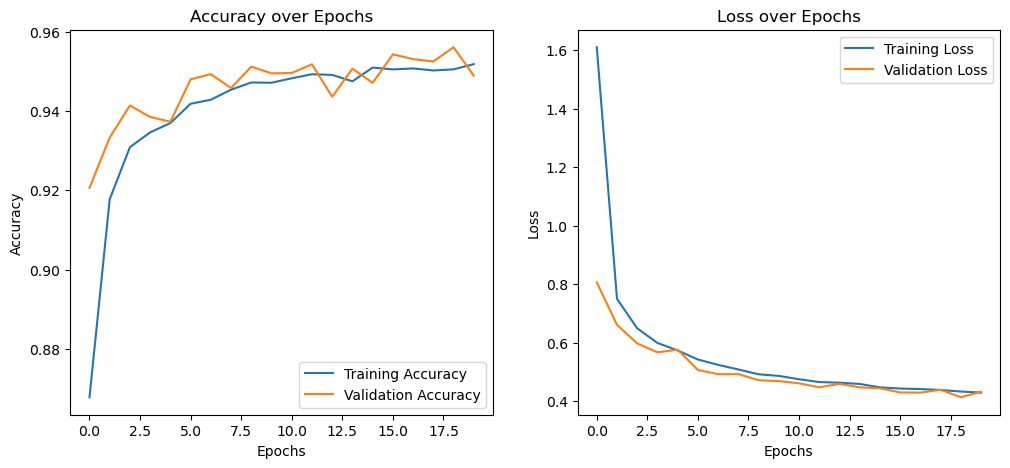

In [5]:
# Build L2 regularization model
def build_l2_model(lambda_value=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(lambda_value)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and plot the results
def train_and_plot(model):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=2)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Create and train L2 model
l2_model = build_l2_model()
train_and_plot(l2_model)


L1 and L2 Regularization Model

Epoch 1/20
938/938 - 4s - 5ms/step - accuracy: 0.1136 - loss: 6.5154 - val_accuracy: 0.1135 - val_loss: 2.5077
Epoch 2/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5081 - val_accuracy: 0.1135 - val_loss: 2.5073
Epoch 3/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5080 - val_accuracy: 0.1135 - val_loss: 2.5091
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5079 - val_accuracy: 0.1135 - val_loss: 2.5084
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5079 - val_accuracy: 0.1135 - val_loss: 2.5074
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5079 - val_accuracy: 0.1135 - val_loss: 2.5079
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5079 - val_accuracy: 0.1135 - val_loss: 2.5073
Epoch 8/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5078 - val_accuracy: 0.1135 - val_loss: 2.5068
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.1124 - loss: 2.5078 - val_accuracy: 0.1135 - val_loss: 2.5081
E

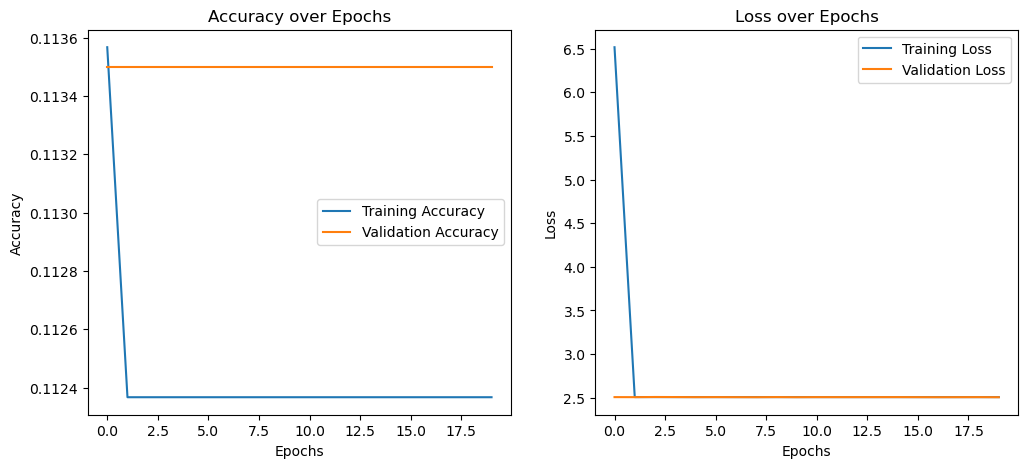

In [6]:
# Build L1 and L2 regularization model
def build_l1_l2_model(lambda_value=0.01):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1_l2(lambda_value)))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and plot the results
def train_and_plot(model):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=2)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Create and train L1 and L2 model
l1_l2_model = build_l1_l2_model()
train_and_plot(l1_l2_model)


Dropout Regularization Model

Epoch 1/20
938/938 - 4s - 4ms/step - accuracy: 0.6099 - loss: 1.1338 - val_accuracy: 0.9073 - val_loss: 0.3460
Epoch 2/20
938/938 - 3s - 3ms/step - accuracy: 0.8589 - loss: 0.5336 - val_accuracy: 0.9309 - val_loss: 0.2595
Epoch 3/20
938/938 - 3s - 3ms/step - accuracy: 0.8933 - loss: 0.4311 - val_accuracy: 0.9389 - val_loss: 0.2223
Epoch 4/20
938/938 - 3s - 3ms/step - accuracy: 0.9056 - loss: 0.3896 - val_accuracy: 0.9442 - val_loss: 0.2099
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.9110 - loss: 0.3661 - val_accuracy: 0.9454 - val_loss: 0.2023
Epoch 6/20
938/938 - 2s - 3ms/step - accuracy: 0.9157 - loss: 0.3441 - val_accuracy: 0.9512 - val_loss: 0.1844
Epoch 7/20
938/938 - 2s - 3ms/step - accuracy: 0.9221 - loss: 0.3206 - val_accuracy: 0.9512 - val_loss: 0.1823
Epoch 8/20
938/938 - 2s - 3ms/step - accuracy: 0.9227 - loss: 0.3198 - val_accuracy: 0.9551 - val_loss: 0.1797
Epoch 9/20
938/938 - 2s - 2ms/step - accuracy: 0.9261 - loss: 0.3068 - val_accuracy: 0.9550 - val_loss: 0.1733
E

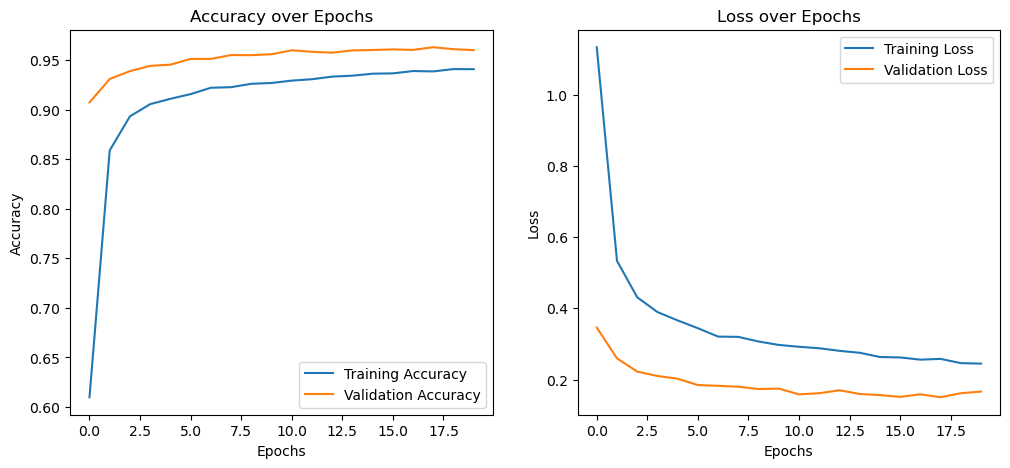

In [7]:
# Build Dropout model
def build_dropout_model(dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dropout(dropout_rate))  # Dropout layer
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model and plot the results
def train_and_plot(model):
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=2)

    # Plot accuracy and loss graphs
    plt.figure(figsize=(12, 5))
    
    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

# Create and train Dropout model
dropout_model = build_dropout_model()
train_and_plot(dropout_model)


 Early Stopping Model

Epoch 1/20
938/938 - 3s - 4ms/step - accuracy: 0.9170 - loss: 0.2720 - val_accuracy: 0.9625 - val_loss: 0.1259
Epoch 2/20
938/938 - 2s - 2ms/step - accuracy: 0.9651 - loss: 0.1132 - val_accuracy: 0.9659 - val_loss: 0.1172
Epoch 3/20
938/938 - 2s - 2ms/step - accuracy: 0.9743 - loss: 0.0830 - val_accuracy: 0.9688 - val_loss: 0.1032
Epoch 4/20
938/938 - 2s - 2ms/step - accuracy: 0.9798 - loss: 0.0650 - val_accuracy: 0.9743 - val_loss: 0.0856
Epoch 5/20
938/938 - 2s - 2ms/step - accuracy: 0.9826 - loss: 0.0554 - val_accuracy: 0.9735 - val_loss: 0.0893
Epoch 6/20
938/938 - 2s - 2ms/step - accuracy: 0.9854 - loss: 0.0462 - val_accuracy: 0.9731 - val_loss: 0.0953
Epoch 7/20
938/938 - 2s - 2ms/step - accuracy: 0.9872 - loss: 0.0401 - val_accuracy: 0.9753 - val_loss: 0.0917
Epoch 1/20
938/938 - 2s - 2ms/step - accuracy: 0.9807 - loss: 0.0606 - val_accuracy: 0.9699 - val_loss: 0.1065
Epoch 2/20
938/938 - 2s - 3ms/step - accuracy: 0.9854 - loss: 0.0471 - val_accuracy: 0.9756 - val_loss: 0.0836
E

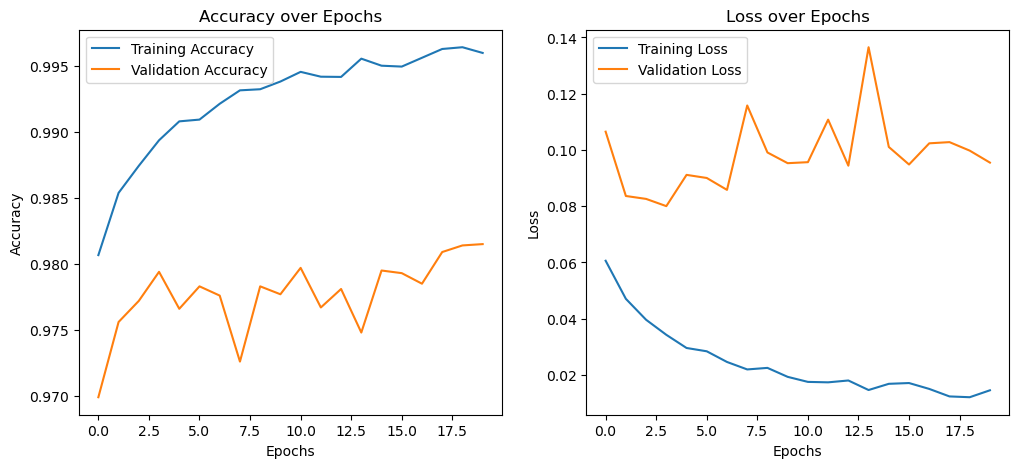

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

# Early Stopping Callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001, restore_best_weights=True)

# Build and train model with early stopping
def build_early_stopping_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with early stopping
early_stopping_model = build_early_stopping_model()
history_with_early_stopping = early_stopping_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                                       epochs=20, batch_size=64, verbose=2,
                                                       callbacks=[early_stopping])

# Plot results
train_and_plot(early_stopping_model)


Data Augmentation Model

Epoch 1/20


c:\Users\VARSHITH\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 - 13s - 14ms/step - accuracy: 0.6094 - loss: 1.1103 - val_accuracy: 0.7943 - val_loss: 0.5809
Epoch 2/20
938/938 - 11s - 12ms/step - accuracy: 0.7627 - loss: 0.6912 - val_accuracy: 0.8642 - val_loss: 0.4059
Epoch 3/20
938/938 - 11s - 12ms/step - accuracy: 0.7987 - loss: 0.5923 - val_accuracy: 0.8839 - val_loss: 0.3430
Epoch 4/20
938/938 - 11s - 12ms/step - accuracy: 0.8242 - loss: 0.5259 - val_accuracy: 0.8922 - val_loss: 0.3291
Epoch 5/20
938/938 - 11s - 12ms/step - accuracy: 0.8365 - loss: 0.4867 - val_accuracy: 0.8897 - val_loss: 0.3276
Epoch 6/20
938/938 - 11s - 12ms/step - accuracy: 0.8456 - loss: 0.4637 - val_accuracy: 0.9061 - val_loss: 0.2822
Epoch 7/20
938/938 - 11s - 12ms/step - accuracy: 0.8521 - loss: 0.4416 - val_accuracy: 0.8998 - val_loss: 0.3053
Epoch 8/20
938/938 - 11s - 12ms/step - accuracy: 0.8599 - loss: 0.4214 - val_accuracy: 0.9157 - val_loss: 0.2433
Epoch 9/20
938/938 - 11s - 12ms/step - accuracy: 0.8651 - loss: 0.4078 - val_accuracy: 0.9169 - val_loss: 0

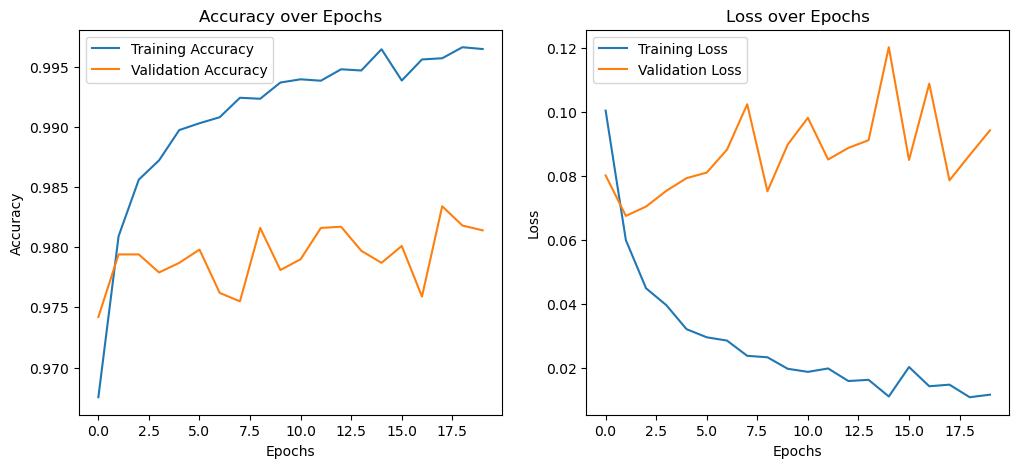

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data Augmentation
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2,
                             zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
datagen.fit(x_train)

# Build model and train with data augmentation
def build_augmented_model():
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the model with data augmentation
augmented_model = build_augmented_model()
history_augmented = augmented_model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_test, y_test),
                                        epochs=20, verbose=2)

# Plot results
train_and_plot(augmented_model)


Combined Regularization (L2 + Dropout + Data Augmentation)

Epoch 1/20


c:\Users\VARSHITH\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 - 13s - 14ms/step - accuracy: 0.1110 - loss: 2.8288 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 2/20
938/938 - 12s - 12ms/step - accuracy: 0.1124 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 3/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 4/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 5/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3014 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 6/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 7/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3011
Epoch 8/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2.3010
Epoch 9/20
938/938 - 11s - 12ms/step - accuracy: 0.1124 - loss: 2.3013 - val_accuracy: 0.1135 - val_loss: 2

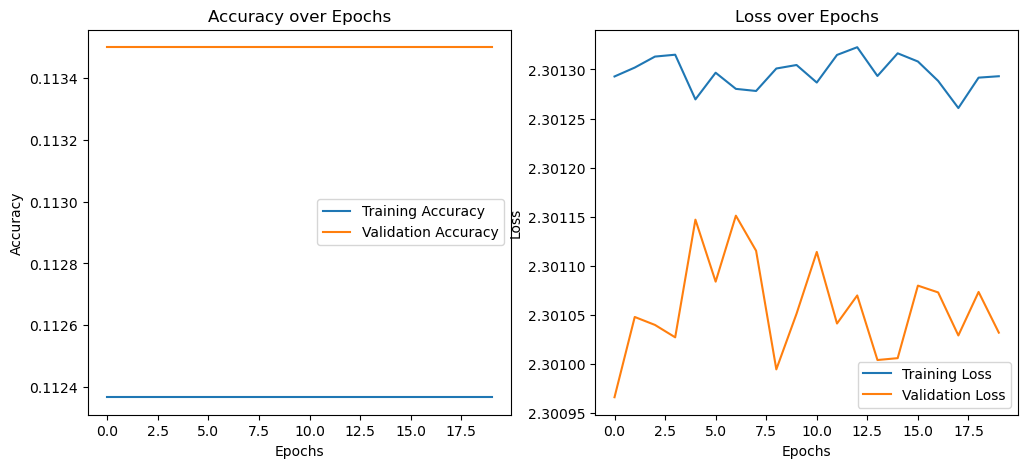

In [10]:
# Build combined regularization model (L2 + Dropout)
def build_combined_model(lambda_value=0.01, dropout_rate=0.5):
    model = models.Sequential()
    model.add(layers.Flatten(input_shape=(28, 28, 1)))
    for _ in range(5):
        model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(lambda_value)))
        model.add(layers.Dropout(dropout_rate))  # Dropout layer
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train the combined regularization model
combined_model = build_combined_model()
history_combined = combined_model.fit(datagen.flow(x_train, y_train, batch_size=64), validation_data=(x_test, y_test),
                                      epochs=20, verbose=2)

# Plot results
train_and_plot(combined_model)
